<a href="https://colab.research.google.com/github/Dawoon-Jeong0523/Lecture_UNIST_2024_Fall/blob/main/Week5_Embedding_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Regular Expressions, Tokenization

---

## **Regular Expressions**:  
   A powerful tool for pattern matching in texts, widely used across programming languages and text-processing tools. It allows for searching and extracting specific patterns from text.

---

In [ ]:
import re

# Sample text containing various patterns
text = """
The items cost $199.99 and $24.99 in total.
Please contact us at info@example.com or call (123) 456-7890.
Visit our website at https://www.example.com or http://example.org.
The meeting is on 2024-10-05, and the second meeting is on 05/10/2024.
"""

# 1. Regular expression to match prices (with optional decimals)
price_pattern = r"\$\d+(?:\.\d{2})?"
prices = re.findall(price_pattern, text)

# 2. Regular expression to match email addresses
email_pattern = r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b"
emails = re.findall(email_pattern, text)

# 3. Regular expression to match phone numbers (US format)
phone_pattern = r"\(\d{3}\) \d{3}-\d{4}"
phone_numbers = re.findall(phone_pattern, text)

# 4. Regular expression to match URLs (http and https)
url_pattern = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
urls = re.findall(url_pattern, text)

# 5. Regular expression to match dates (various formats: YYYY-MM-DD, DD/MM/YYYY)
date_pattern = r"\b\d{4}-\d{2}-\d{2}\b|\b\d{2}/\d{2}/\d{4}\b"
dates = re.findall(date_pattern, text)

# Output matched patterns
print("Matched prices:", prices)
print("Matched emails:", emails)
print("Matched phone numbers:", phone_numbers)
print("Matched URLs:", urls)
print("Matched dates:", dates)


Matched prices: ['$199.99', '$24.99']
Matched emails: ['info@example.com']
Matched phone numbers: ['(123) 456-7890']
Matched URLs: ['https://www.example.com', 'http://example.org.']
Matched dates: ['2024-10-05', '05/10/2024']


## Explanation of Regular Expression Patterns:

1. **Price Pattern** (`\$\d+(?:\.\d{2})?`):
   - This pattern matches prices that start with the dollar sign (`$`), followed by one or more digits (`\d+`), optionally followed by a decimal point and exactly two digits (`\.\d{2}`). This pattern will capture prices like `$199`, `$24.99`, etc.
   
<br>

2. **Email Pattern** (`[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}`):
   - This pattern matches email addresses. The local part (before the `@`) can contain alphanumeric characters and special characters like `.`, `_`, `%`, `+`, or `-`. After the `@`, it expects a domain name made of alphanumeric characters, hyphens, and dots, followed by a top-level domain (like `.com` or `.org`) with at least two letters.

<br>
   
3. **Phone Number Pattern** (`\(\d{3}\) \d{3}-\d{4}`):
   - This pattern matches US phone numbers in the format `(123) 456-7890`. It expects an area code enclosed in parentheses, followed by a space, three digits, a hyphen, and four more digits.

<br>

4. **URL Pattern** (`http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+`):
   - This pattern matches URLs that start with `http` or `https`, followed by `://`, and then a valid sequence of URL characters. It includes alphanumeric characters, special characters like `-`, `_`, `.`, and others, allowing for complex web addresses.

<br>

5. **Date Pattern** (`\b\d{4}-\d{2}-\d{2}\b|\b\d{2}/\d{2}/\d{4}\b`):
   - This pattern matches two common date formats. It matches dates in the format `YYYY-MM-DD` (e.g., `2024-10-05`) or `DD/MM/YYYY` (e.g., `05/10/2024`). The `\b` ensures word boundaries so that the pattern is not part of a larger string.

---
These patterns can be used to identify and extract specific types of data like prices, emails, phone numbers, URLs, and dates from a given text.


## **Text Normalization**:  
   The process of transforming text into a standard format. This includes:
   - **Tokenization**: Splitting text into individual words or tokens.
   - **Lemmatization**: Reducing words to their base forms (e.g., "sang", "sung", and "sings" are reduced to "sing").
   - **Stemming**: A simpler process than lemmatization, where only word suffixes are removed (e.g., "fishing" becomes "fish").
   - **Sentence Segmentation**: Breaking down text into individual sentences using punctuation like periods or question marks.

---

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary data for nltk
nltk.download('punkt')  # Punkt tokenizer model, used for sentence and word tokenization
nltk.download('wordnet')  # WordNet lexical database, required for lemmatization

# Sample text
text = "The children are playing with toys in the park."

# Tokenization
tokens = word_tokenize(text)  # Tokenizes the input sentence into individual words

# Lemmatization
lemmatizer = WordNetLemmatizer()  # Initializes the lemmatizer object

# Lemmatize each word in the tokens list
# Lemmatization returns the base or dictionary form of the word (e.g., "fishermen" -> "fisherman")
lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]

# Stemming
stemmer = PorterStemmer()  # Initializes the stemmer object
# Stem each word in the tokens list
# Stemming reduces a word to its base form by removing affixes (e.g., "fishing" -> "fish")
stemmed_words = [stemmer.stem(token) for token in tokens]

# Output the results
print("Original Tokens:", tokens)  # Displays the original tokenized words
print("Lemmatized Words:", lemmatized_words)  # Displays the words after lemmatization
print("Stemmed Words:", stemmed_words)  # Displays the words after stemming


Original Tokens: ['The', 'children', 'are', 'playing', 'with', 'toys', 'in', 'the', 'park', '.']
Lemmatized Words: ['The', 'child', 'are', 'playing', 'with', 'toy', 'in', 'the', 'park', '.']
Stemmed Words: ['the', 'children', 'are', 'play', 'with', 'toy', 'in', 'the', 'park', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



##  **Tokenization Challenges**:
   - Tokenizing English text is relatively simple because words are often separated by spaces. However, challenges arise with:
     - Multi-word expressions like "New York."
     - Handling contractions like "I’m" into "I" and "am."
     - Dealing with emoticons and hashtags in social media content.

---

In [ ]:
import re

# Sample text containing multi-word expressions and contractions
text = "I’m going to New York next week."

# Regular expression for tokenizing
# Handles multi-word expressions like "New York" and contractions like "I’m"
pattern = r"\bNew York\b|I'm|I\s+am|\w+"

# Tokenize the text
tokens = re.findall(pattern, text)

print("Tokens:", tokens)

Tokens: ['I', 'm', 'going', 'to', 'New York', 'next', 'week']


# One-Hot Encoding

One-hot encoding is a process used to convert categorical data into a numerical format that machine learning models can work with. It is especially useful when dealing with categorical variables that do not have an inherent numerical order, such as colors, countries, or product categories.

### How It Works:
One-hot encoding transforms each unique category into a binary vector. Each vector is all zeros except for the position corresponding to the specific category, which is set to 1.

### Example:
Consider a categorical variable representing **Colors** with three possible values: `Red`, `Green`, and `Blue`.

1. **Original Categories**:
   - Red
   - Green
   - Blue

<br>


2. **One-Hot Encoding Representation**:

   - `Red`  → `[1, 0, 0]`
   - `Green`  → `[0, 1, 0]`
   - `Blue`  → `[0, 0, 1]`

### Key Points:
- Each category is represented as a unique vector.
- The number of binary vectors equals the number of unique categories.
- The vector length is the same as the number of categories, and only one bit is "hot" (1), while the rest are "cold" (0).

### Advantages:
- **Simple Representation**: Provides a clear and straightforward way to represent categorical data.
- **Model Compatibility**: Many machine learning algorithms require numerical inputs, so one-hot encoding helps convert categorical data into a usable format.
  
### Disadvantages:
- **High Dimensionality**: If the number of categories is large, the resulting one-hot encoded vectors can become very sparse and high-dimensional.
- **Redundancy**: Only one bit carries meaningful information, while the others are always zero, leading to inefficiency when many categories are present.


In [ ]:
import pandas as pd

# Sample data
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

# Creating a DataFrame
df = pd.DataFrame({'Color': colors})

# Applying one-hot encoding with integers (0, 1)
one_hot_encoded_df = pd.get_dummies(df, columns=['Color'], dtype=int)
one_hot_encoded_df

,Color_Blue,Color_Green,Color_Red
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1


# Data: BBC text

BBC text dta can be accessed via: https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

The data is consisted of 5 categories and 2,225 texts:

In [ ]:
data = pd.read_csv('Data/bbc.csv')
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
data.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
data.loc[0]['text']

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [ ]:
len(data.loc[0]['text'])

4333

In [ ]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

# Document-Term Matrix (DTM)

The **Document-Term Matrix (DTM)** is a fundamental representation in text mining and Natural Language Processing (NLP). It is used to represent documents as rows and words as columns, with the cells containing the frequency of the words in each document. This matrix provides a way to analyze the textual content in a structured, numerical format, which is crucial for various downstream tasks like text classification, clustering, or sentiment analysis.

## Structure of a DTM
A **DTM** is composed as follows:
- **Rows (Documents):** Each row in the matrix corresponds to a document from the corpus.
- **Columns (Terms):** Each column represents a unique word (or term) from the entire collection of documents.
- **Elements (Frequencies):** The values within the matrix indicate how many times a specific word appears in each document. This value can represent a simple count of occurrences or other metrics like Term Frequency-Inverse Document Frequency (TF-IDF).

## Example Data Set

Consider the following example data set:

| Index | Category      | Text                                                             |
|-------|---------------|------------------------------------------------------------------|
| 0     | Tech          | tv future in the hands of viewers with home theatre systems       |
| 1     | Business      | worldcom boss left books alone former worldcom accounting         |
| 2     | Sport         | tigers wary of farrell gamble leicester say gamble worth risk     |
| 3     | Sport         | yeading face newcastle in fa cup premiership showdown             |
| 4     | Entertainment | ocean s twelve raids box office ocean s twelve                   |

### Steps for Creating a Document-Term Matrix

1. **Text Preprocessing**  
   Before building a DTM, text data needs to be preprocessed. Preprocessing typically includes:
   - **Lowercasing:** Convert all the text to lowercase to avoid case-sensitivity issues.
   - **Tokenization:** Split each document into individual words (tokens).
   - **Removing Stop Words (Optional):** Removing common but irrelevant words like "the," "is," "in" may enhance focus on more meaningful terms.
   - **Text Normalization:** Lemmatization, Stemming, Sentence Segmentation, ...

<br>
   
2. **Build the Vocabulary**  
   After preprocessing, create a vocabulary, which is a collection of all unique words from the corpus. This set of words will serve as the columns of the DTM. For instance, with the above data set, the vocabulary could include words like:
   - tv, future, hands, worldcom, boss, gamble, ocean, box, etc.

<br>

3. **Construct the Matrix**  
   The matrix is constructed by calculating how many times each word in the vocabulary appears in each document. The result is a sparse matrix where most of the values are zero, indicating that a word does not appear in a document. For example:

<br>

| Document/Word | tv | future | hands | worldcom | boss | gamble | fa | cup | ocean | box | office | ... |
|---------------|----|--------|-------|----------|------|--------|----|-----|-------|-----|--------|-----|
| **Doc 0**     |  1 |   1    |   1   |    0     |  0   |   0    |  0 |  0  |   0   |  0  |    0   | ... |
| **Doc 1**     |  0 |   0    |   0   |    2     |  1   |   0    |  0 |  0  |   0   |  0  |    0   | ... |
| **Doc 2**     |  0 |   0    |   0   |    0     |  0   |   2    |  0 |  0  |   0   |  0  |    0   | ... |
| **Doc 3**     |  0 |   0    |   0   |    0     |  0   |   0    |  1 |  1  |   0   |  0  |    0   | ... |
| **Doc 4**     |  0 |   0    |   0   |    0     |  0   |   0    |  0 |  0  |   2   |  1  |    1   | ... |

In this matrix:
- **Document 0 (Tech)** contains the words "tv," "future," and "hands," each appearing once, so the respective cells are filled with 1.
- **Document 1 (Business)** includes the word "worldcom," which appears twice, and "boss," which appears once.
- **Document 2 (Sport)** has the word "gamble" appearing twice, among others.

### Key Concepts in DTM Construction

- **Term Frequency (TF):** Represents the raw count of how many times a word occurs in a document. This is typically the base form of a DTM.
- **Inverse Document Frequency (IDF):** Adjusts the weight of terms based on their frequency across all documents, giving less importance to common words that appear in many documents. This is used in **TF-IDF** matrices.


In [ ]:
import numpy as np

# Sample data - list of documents
docs = [
    "tv future in the hands of viewers with home theatre systems",
    "worldcom boss left books alone former worldcom accounting",
    "tigers wary of farrell gamble leicester say gamble worth risk",
    "yeading face newcastle in fa cup premiership showdown",
    "ocean s twelve raids box office ocean s twelve"
]

# Function to create a DTM
def create_dtm(documents):
    # Tokenizing each document into words and building the vocabulary
    vocabulary = sorted(set(word for doc in documents for word in doc.split()))
    dtm = np.zeros((len(documents), len(vocabulary)))

    # Populating the DTM with word counts
    for i, doc in enumerate(documents):
        words = doc.split()
        for word in words:
            if word in vocabulary:
                dtm[i][vocabulary.index(word)] += 1

    return dtm, vocabulary

# Create DTM
dtm, vocab = create_dtm(docs)
print("Document-Term Matrix:\n")
pd.DataFrame(dtm,columns = vocab)

Document-Term Matrix:



,accounting,alone,books,boss,box,cup,fa,face,farrell,former,...,theatre,tigers,tv,twelve,viewers,wary,with,worldcom,worth,yeading
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


# Measuring Document Similarity Using Document-Term Matrix (DTM)

When working with a collection of documents, the **Document-Term Matrix (DTM)** is a common representation that captures the frequency of words (terms) across documents. Each row of the DTM corresponds to a document, and each column represents a unique term (word). The value at each position $(i, j)$ in the matrix is the frequency count of the term $j$ in document $i$.

Once the DTM is constructed, the similarity between documents can be measured by comparing their corresponding vectors using various similarity measures.

## Common Similarity Measures

### 1. Cosine Similarity

Measures the cosine of the angle between two document vectors. It ranges from -1 (completely opposite) to 1 (identical), where:
- 1 means the vectors are identical or pointing in the same direction.
- -1 means the vectors are pointing in opposite directions.

The formula is:

$$
\text{Cosine Similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}
$$

Where:
- $A \cdot B$ is the dot product of two vectors.
- $\|A\|$ and $\|B\|$ are the magnitudes (norms) of the vectors.

### 2. Euclidean Distance

Measures the straight-line distance between two document vectors. Smaller distances indicate higher similarity.

$$
\text{Euclidean Distance}(A, B) = \sqrt{\sum_{i=1}^{n}(A_i - B_i)^2}
$$

### 3. Jaccard Similarity

Measures the similarity between two sets (or vectors) by dividing the size of their intersection by the size of their union. It ranges from 0 (completely dissimilar) to 1 (identical).

$$
\text{Jaccard Similarity}(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$

---

In [ ]:
# Cosine Similarity Function
def cosine_similarity(doc1, doc2):
    dot_product = np.dot(doc1, doc2)
    magnitude = np.linalg.norm(doc1) * np.linalg.norm(doc2)
    if magnitude == 0:
        return 0  # Avoid division by zero
    return dot_product / magnitude

# Euclidean Distance Function
def euclidean_distance(doc1, doc2):
    return np.sqrt(np.sum((doc1 - doc2) ** 2))

# Jaccard Similarity Function
def jaccard_similarity(doc1, doc2):
    intersection = np.minimum(doc1, doc2).sum() # set(doc1).intersection(set(doc2))
    union = np.maximum(doc1, doc2).sum() # set(doc1).union(set(doc2))
    if union == 0:
        return 0  # Avoid division by zero
    return intersection / union

doc1 = dtm[0]
doc1 = dtm[0]

print("\nCosine Similarity between Document 1 and 1:", cosine_similarity(doc1, doc1))
print("Euclidean Distance between Document 1 and 1:", euclidean_distance(doc1, doc1))
print("Jaccard Similarity between Document 1 and 1:", jaccard_similarity(doc1, doc1))



Cosine Similarity between Document 1 and 1: 1.0
Euclidean Distance between Document 1 and 1: 0.0
Jaccard Similarity between Document 1 and 1: 1.0


In [ ]:
doc1 = dtm[0]
doc4 = dtm[3]

print("\nCosine Similarity between Document 1 and 4:", cosine_similarity(doc1, doc4))
print("Euclidean Distance between Document 1 and 4:", euclidean_distance(doc1, doc4))
print("Jaccard Similarity between Document 1 and 4:", jaccard_similarity(doc1, doc4))



Cosine Similarity between Document 1 and 4: 0.10660035817780521
Euclidean Distance between Document 1 and 4: 4.123105625617661
Jaccard Similarity between Document 1 and 4: 0.05555555555555555


# TF-IDF (Term Frequency-Inverse Document Frequency)

**TF-IDF** stands for **Term Frequency-Inverse Document Frequency**, a statistical measure used to evaluate how important a word is to a document in a collection or corpus. It is commonly used in text mining and information retrieval to reflect the significance of a word in a document relative to the entire corpus.

The core idea of TF-IDF is that:
- **Term Frequency (TF)** measures how frequently a word occurs in a document.
- **Inverse Document Frequency (IDF)** adjusts the weight of words by penalizing commonly used words and emphasizing rare or more distinctive terms across the corpus.

## Components of TF-IDF

### **Term Frequency (TF)**

The **Term Frequency** of a term $t$ in a document $d$ is calculated as the ratio of the number of times the term appears in the document to the total number of terms in the document:

$$
TF(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
$$

This value represents how important a term is within a specific document.

### **Inverse Document Frequency (IDF)**

The **Inverse Document Frequency** measures how important a term is across the entire corpus. It is defined as:

$$
IDF(t, D) = \log{\frac{N}{1 + \text{Number of documents containing term } t}}
$$

Where:
- $N$ is the total number of documents in the corpus.
- The logarithm is used to scale down the impact of terms that appear in many documents, preventing them from dominating the results.

Adding $1$ to the denominator ensures that terms appearing in all documents do not result in division by zero.

### **TF-IDF Calculation**

The TF-IDF value for a term $t$ in a document $d$ is calculated by multiplying the term frequency by the inverse document frequency:

$$
TF\text{-}IDF(t, d, D) = TF(t, d) \times IDF(t, D)
$$

This calculation adjusts the term frequency by the importance of the term across the entire corpus. Words that frequently appear in one document but are rare across other documents will have a higher TF-IDF score, signaling that they are more important for that document.

---

In [ ]:
import math

# Sample documents
docs = [
    "tv future in the hands of viewers with home theatre systems",
    "worldcom boss left books alone former worldcom accounting",
    "tigers wary of farrell gamble leicester say gamble worth risk",
    "yeading face newcastle in fa cup premiership showdown",
    "ocean s twelve raids box office ocean s twelve"
]

# Step 1: Create the Vocabulary
def build_vocabulary(documents):
    vocabulary = []
    for doc in documents:
        words = doc.split()
        for word in words:
            if word not in vocabulary:
                vocabulary.append(word)
    return vocabulary

# Step 2: Calculate Term Frequency (TF)
def compute_tf(document, vocabulary):
    term_freq = {word: 0 for word in vocabulary}
    doc_words = document.split()
    for word in doc_words:
        term_freq[word] += 1
    # Normalize by total number of terms in the document
    doc_length = len(doc_words)
    tf = {}
    for word in vocabulary:
        tf[word] = term_freq[word] / doc_length
    return tf

# Step 3: Calculate Inverse Document Frequency (IDF)
def compute_idf(documents, vocabulary):
    N = len(documents)
    idf_values = {word: 0 for word in vocabulary}

    for doc in documents:
        doc_words = set(doc.split())  # Unique words in document
        for word in doc_words:
            if word in vocabulary:
                idf_values[word] += 1

    # Apply IDF formula and use log scaling
    idf = {}
    for word in vocabulary:
        idf[word] = math.log(N / (1 + idf_values[word]))
    return idf

# Step 4: Calculate TF-IDF
def compute_tf_idf(tf, idf):
    tf_idf = {}
    for word in tf:
        tf_idf[word] = tf[word] * idf[word]
    return tf_idf

# Step 5: Putting it all together
vocabulary = build_vocabulary(docs)

# Compute IDF for the entire corpus
idf_values = compute_idf(docs, vocabulary)

# Store TF-IDF values for each document in a DataFrame
tf_idf_df = pd.DataFrame(columns=vocabulary)

for i, doc in enumerate(docs):
    tf_values = compute_tf(doc, vocabulary)
    tf_idf_values = compute_tf_idf(tf_values, idf_values)

    # Store TF-IDF values in DataFrame
    tf_idf_df.loc[i] = [tf_idf_values[word] for word in vocabulary]

In [ ]:
# Compute TF-IDF
tf_idf = np.array(tf_idf_df)
print("\nTF-IDF Matrix:\n")
tf_idf_df


TF-IDF Matrix:



,tv,future,in,the,hands,of,viewers,with,home,theatre,...,fa,cup,premiership,showdown,ocean,s,twelve,raids,box,office
0,0.083299,0.083299,0.046439,0.083299,0.083299,0.046439,0.083299,0.083299,0.083299,0.083299,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.051083,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.000000,0.000000,0.063853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.114536,0.114536,0.114536,0.114536,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.20362,0.20362,0.20362,0.10181,0.10181,0.10181


In [ ]:
pd.DataFrame(dtm,columns = vocab)

,accounting,alone,books,boss,box,cup,fa,face,farrell,former,...,theatre,tigers,tv,twelve,viewers,wary,with,worldcom,worth,yeading
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
doc1 = tf_idf[0]
doc4 = tf_idf[3]

print("\nCosine Similarity between Document 1 and 4:", cosine_similarity(doc1, doc4))
print("Euclidean Distance between Document 1 and 4:", euclidean_distance(doc1, doc4))
print("Jaccard Similarity between Document 1 and 4:", jaccard_similarity(doc1, doc4))


Cosine Similarity between Document 1 and 4: 0.03705721526816219
Euclidean Distance between Document 1 and 4: 0.3959022337520979
Jaccard Similarity between Document 1 and 4: 0.02794584550152837


# **Limitations of DTM and TF-IDF**

While DTM (and TF-IDF) provides a clear snapshot of the distribution of words across documents, it faces the following limitations:

- **Sparse Data**: Most documents do not contain all words in the vocabulary, which results in a sparse matrix (many zeros). This sparsity can make calculations inefficient and fail to capture important relationships between words.
  
- **Lack of Semantic Relationships**: DTM (and TF-IDF) focuses solely on word frequency and ignores the relationships between words. For example, **synonyms** like "automobile" and "car" are treated as completely different words, even though they carry similar meanings.

- **High Dimensionality**: As the vocabulary grows, the dimensionality of the DTM (and TF-IDF) increases, making it computationally expensive to work with. This is particularly problematic when processing large text corpora.


## **Next Step:**

To address these limitations, modern Natural Language Processing (NLP) shifts towards **vector semantics**, which represents words as points in a continuous vector space, also known as **word embeddings**. These vectors are learned from the distribution of words in a large corpus, capturing semantic relationships between words based on their context. This transition is grounded in the **distributional hypothesis**, which states that words occurring in similar contexts tend to have similar meanings.

---

# Vector Semantics and Embeddings

Vector semantics is the standard way to represent word meaning in NLP, helping model many aspects of word meaning through the distribution of neighboring words. This idea has its roots in the 1950s when two key concepts converged:

![image.png](attachment:image.png)

1. **Osgood's Idea (1957)**: He proposed representing word connotations as a point in a three-dimensional space.
2. **Distributional Hypothesis**: Linguists like Joos (1950), Harris (1954), and Firth (1957) suggested that the meaning of a word can be defined by its distribution in language use, particularly by the neighboring words or grammatical environments. Words that occur in similar contexts tend to have similar meanings.

## Example:
Imagine encountering the word `ongchoi` in contexts like the following:
- "Ongchoi is delicious sauteed with garlic."
- "Ongchoi is superb over rice."
- "...ongchoi leaves with salty sauces..."

By analyzing the neighboring words (`garlic`, `rice`, `salty`, `delicious`), and comparing them with other contexts (e.g., spinach, chard, collard greens), one can infer that `ongchoi` is likely a type of leafy green similar to those other vegetables.

## Vector Embeddings:
Vector semantics represents words as points in a multi-dimensional space, where similar words are close to each other. These vectors are called **embeddings**. The idea of "embedding" comes from the mathematical concept of mapping one space or structure into another. In NLP, embeddings can be sparse vectors (e.g., **tf-idf** or **DTM**) or dense vectors (e.g., **word2vec**).


# Latent Semantic Analysis using Singular Value Decomposition

Singular Value Decomposition (SVD) is a fundamental matrix decomposition technique in linear algebra. It allows us to decompose a complex matrix into three simpler matrices, making it easier to capture the essential structure of the data. SVD is widely used in areas like information retrieval, natural language processing (NLP), and image processing.

## Basic Concept of SVD


![image.png](attachment:image.png)


SVD decomposes a matrix $A$ into three matrices:

$$
A = U \Sigma V^T
$$

Where:
- $A$: An original matrix of size $m \times n$
- $U$: An $m \times m$ orthogonal matrix.
- $\Sigma$: An $m \times n$ diagonal matrix containing the **singular values**. Singular values represent the importance of each component.
- $V^T$: An $n \times n$ orthogonal matrix.

An orthogonal matrix is a matrix whose identity matrix is the product of itself and its transposed matrix, or vice versa. A diagonal matrix is a matrix whose elements are zero everywhere except along the main diagonal.

## Components of SVD

1. **Singular Values ($\Sigma$)**:
   - $\Sigma$ is a diagonal matrix where the diagonal elements are the singular values of matrix $A$. Singular values capture the importance or magnitude of each dimension.
   - Larger singular values indicate more important dimensions, while smaller ones correspond to less significant components (often noise).
   
   <br>

2. **$U$ (Left Singular Vectors)**:
   - The matrix $U$ transforms the **rows** of matrix $A$ into a new feature space. Each row vector in $U$ represents a document's distribution in the new feature space.

   <br>

3. **$V^T$ (Right Singular Vectors)**:
   - The matrix $V^T$ transforms the **columns** of matrix $A$ into a new space.

In [ ]:
import numpy as np

# Sample matrix A
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [1, 1, 0],
              [0, 0, 1]])

# Perform Singular Value Decomposition using NumPy
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)

# Sigma is returned as a 1D array, so we convert it to a diagonal matrix
Sigma_matrix = np.diag(Sigma)

# Print the resulting matrices
print("U matrix:\n", U)
print("\nSigma matrix:\n", Sigma_matrix)
print("\nVt matrix:\n", Vt)

# Reconstruct the original matrix by multiplying U, Sigma, and Vt
A_reconstructed = np.dot(U, np.dot(Sigma_matrix, Vt))

print("\nReconstructed matrix:\n", A_reconstructed)


U matrix:
 [[-4.08248290e-01  0.00000000e+00  7.07106781e-01]
 [-4.08248290e-01  0.00000000e+00 -7.07106781e-01]
 [-8.16496581e-01  0.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00 -1.00000000e+00  0.00000000e+00]]

Sigma matrix:
 [[1.73205081 0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]

Vt matrix:
 [[-0.70710678 -0.70710678 -0.        ]
 [-0.         -0.         -1.        ]
 [ 0.70710678 -0.70710678 -0.        ]]

Reconstructed matrix:
 [[ 1.00000000e+00 -1.11022302e-16  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


# Truncated SVD

![image.png](attachment:image.png)

**Truncated SVD** is a dimensionality reduction technique based on Singular Value Decomposition (SVD). While the standard SVD decomposes a matrix into three matrices ($U$, $\Sigma$, and $V^T$), **truncated SVD** retains only the most important singular values and corresponding vectors, thus reducing the number of dimensions.

This method is particularly useful when working with large, sparse datasets, such as those in natural language processing or recommendation systems, as it improves computational efficiency and storage without significantly losing information.

## Mathematical Definition of Truncated SVD

Given a matrix $A$ of size $m \times n$, the standard SVD decomposes it as follows:

$$
A = U \Sigma V^T
$$

Where:
- $U$: an $m \times m$ orthogonal matrix.
- $\Sigma$: an $m \times n$ diagonal matrix of singular values.
- $V^T$: an $n \times n$ orthogonal matrix.

In **truncated SVD**, only the top $k$ largest singular values (and corresponding vectors from $U$ and $V^T$) are retained. Thus, truncated SVD is given by:

$$
A_k = U_k \Sigma_k V_k^T
$$

Where:
- $U_k$: the matrix formed by the first $k$ columns of $U$.
- $\Sigma_k$: the diagonal matrix formed by the first $k$ singular values.
- $V_k^T$: the matrix formed by the first $k$ rows of $V^T$.

Here, $k$ is a user-defined value that determines the number of dimensions to retain. Typically, $k$ is much smaller than the original dimensions of $A$, resulting in dimensionality reduction.


In [ ]:
import numpy as np

# Sample matrix A
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [1, 1, 0],
              [0, 0, 1]])

# Perform full SVD using NumPy
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)

# Keep only the top 2 singular values for truncation
k = 2
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt[:k, :]

# Reconstruct the truncated matrix A_k
A_k = np.dot(U_k, np.dot(Sigma_k, Vt_k))

# Display the truncated matrix A_k
print("Truncated matrix A_k:\n", A_k)

Truncated matrix A_k:
 [[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [1.  1.  0. ]
 [0.  0.  1. ]]


# The Process of Latent Semantic Analysis (LSA)

Let’s assume that the input matrix $A$ (Word-Document Matrix $m \times n$) represents $n$ documents with $m$ words. After applying SVD to matrix $A$, we can decompose it into three matrices: $U$, $\Sigma$, and $V^T$. The number of non-zero singular values is $r$, and we select a smaller value $k < r$. From the matrices $U$ and $V$, we retain only the top $k$ singular values and construct reduced matrices $U_k$, $\Sigma_k$, and $V_k^T$ to approximate matrix $A$.

The approximation of $A$ is given by:

$$
A_k = U_k \Sigma_k V_k^T
$$

Next, by multiplying the transpose of $U_k$ to both sides of the equation, we obtain $X_1$:

$$
U_k^T A = U_k^T U_k \Sigma_k V_k^T = \Sigma_k V_k^T = X_1
$$

Here, $X_1$ represents the documents in the reduced $k$-dimensional space.

Similarly, by multiplying $V_k$ to both sides, we obtain $X_2$:

$$
A V_k = U_k \Sigma_k V_k^T V_k = U_k \Sigma_k = X_2
$$

Here, $X_2$ represents the words in the reduced $k$-dimensional space.


In [ ]:
import numpy as np

# Example Word-Document Matrix
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [1, 1, 0],
              [0, 0, 1]])

# Perform full SVD using NumPy
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)

# Truncate SVD (Keep only the top 2 singular values)
k = 2
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt[:k, :]

# Reconstruct the matrix A' using Truncated SVD
A_k = np.dot(U_k, np.dot(Sigma_k, Vt_k))

# Print the results
print("Original matrix A:\n", A)
print("\nTruncated matrix A_k:\n", A_k)

# Reduced document embeddings (X1)
X1 = np.dot(U_k.T, A)
print("\nDocument embeddings (X1):\n", X1)

# Reduced word embeddings (X2)
X2 = np.dot(A, Vt_k.T)
print("\nWord embeddings (X2):\n", X2)

Original matrix A:
 [[1 0 0]
 [0 1 0]
 [1 1 0]
 [0 0 1]]

Truncated matrix A_k:
 [[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [1.  1.  0. ]
 [0.  0.  1. ]]

Document embeddings (X1):
 [[-1.22474487 -1.22474487  0.        ]
 [ 0.          0.         -1.        ]]

Word embeddings (X2):
 [[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-1.41421356  0.        ]
 [ 0.         -1.        ]]


# Latent Semantic Analysis: BBC data

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

# Ensure you have downloaded the required resources if not already done
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# Function to check if a word is a noun
def is_noun(pos_tag):
    return pos_tag.startswith('NN')  # NN for singular, NNS for plural nouns

# Function to get wordnet POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Preprocessing: Tokenizing, removing punctuation, lowercasing, stopwords removal, and lemmatization
def tokenize_corpus(corpus):
    stop_words = set(stopwords.words('english'))  # Get stopwords
    lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer

    processed_corpus = []

    for sentence in corpus:
        # Convert to lowercase
        sentence = sentence.lower()

        # Remove punctuation and non-alphabetic characters
        sentence = re.sub(r'[^a-z\s]', '', sentence)

        # Tokenize (split the sentence into words)
        words = sentence.split()

        # Remove stopwords
        filtered_words = [word for word in words if word not in stop_words]

        # POS tagging the filtered words
        pos_tags = pos_tag(filtered_words)

        # Keep only nouns and lemmatize them
        processed_sentence = [
            lemmatizer.lemmatize(word, get_wordnet_pos(pos))
            for word, pos in pos_tags if is_noun(pos)
        ]

        processed_corpus.append(processed_sentence)

    return processed_corpus

In [ ]:
len(data)

2225

In [ ]:
corpus = data['text']
tokenized_corpus = tokenize_corpus(corpus)

In [ ]:
len(vocabulary)

16565

In [ ]:
# Build a vocabulary
vocabulary = sorted(set([word for sentence in tokenized_corpus for word in sentence]))
vocab_size = len(vocabulary)
word_to_index = {word: i for i, word in enumerate(vocabulary)}

In [ ]:
word_to_index['tv']

15432

In [ ]:
from collections import defaultdict

# Count word frequencies
word_freq = defaultdict(int)
for sentence in tokenized_corpus:
    for word in sentence:
        word_freq[word] += 1

In [ ]:
word_freq['tv']

462

In [ ]:
# Filter the vocabulary to include only words that appear more than 50 times
min_freq = 50
vocabulary = sorted([word for word, freq in word_freq.items() if freq >= min_freq])

# Display vocabulary
print(f"Filtered Vocabulary (words with more than {min_freq} occurrences):")
print(len(vocabulary),vocabulary)

Filtered Vocabulary (words with more than 50 occurrences):
914 ['ability', 'academy', 'access', 'account', 'act', 'action', 'activity', 'actor', 'actress', 'address', 'administration', 'adult', 'advantage', 'advice', 'affair', 'africa', 'age', 'agency', 'agent', 'agreement', 'aid', 'air', 'airline', 'alan', 'album', 'allegation', 'ambition', 'america', 'amount', 'analyst', 'angeles', 'announcement', 'answer', 'anyone', 'anything', 'appeal', 'appearance', 'apple', 'application', 'approach', 'approval', 'april', 'area', 'arm', 'art', 'artist', 'asset', 'association', 'asylum', 'athens', 'athlete', 'athletics', 'attack', 'attempt', 'attention', 'attorney', 'auction', 'audience', 'authority', 'aviator', 'award', 'baby', 'ball', 'ban', 'band', 'bank', 'bankruptcy', 'basis', 'battle', 'bbc', 'beat', 'benefit', 'bid', 'bill', 'bit', 'blair', 'blog', 'blue', 'blunkett', 'bn', 'board', 'body', 'boerse', 'bond', 'book', 'boost', 'border', 'bos', 'box', 'boy', 'brand', 'break', 'britain', 'briton

In [ ]:
# Create a word to index mapping
vocab_size = len(vocabulary)
index_to_word = {i: word for i, word in enumerate(vocabulary)}
len(index_to_word)

914

In [ ]:
index_to_word[i]

'zealand'

In [ ]:
# Create Word-Document Matrix
Word_Document_Matrix = np.zeros((vocab_size,len(tokenized_corpus)))

for i in range(vocab_size):
    for j in range(len(tokenized_corpus)):
        Word_Document_Matrix[i,j] = tokenized_corpus[j].count(index_to_word[i])

In [ ]:
Word_Document = pd.DataFrame(Word_Document_Matrix,index = vocabulary)
Word_Document.head()

,0,1,2,3,4,5,6,7,8,9,...,2215,2216,2217,2218,2219,2220,2221,2222,2223,2224
ability,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
academy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
access,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
account,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
act,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
Word_Document.shape

(914, 2225)

In [ ]:
# Step 1: Word - Document Matrix
X = Word_Document

# Step 2: Perform SVD (Singular Value Decomposition)
U, Sigma, Vt = np.linalg.svd(X, full_matrices=False)

# Truncate SVD (Keep only the top 100 singular values)
k = 100
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt[:k, :]

# Reconstruct the matrix A_k using Truncated SVD
A_k = np.dot(U_k, np.dot(Sigma_k, Vt_k))

# Step 3: Print the results
print("\nTruncated matrix A_k (Approximation of Term-Document Matrix):\n", A_k)


Truncated matrix A_k (Approximation of Term-Document Matrix):
 [[ 0.12511586  0.042741    0.0396512  ... -0.00315101  0.02239012
   0.02291508]
 [-0.04794545 -0.0701416  -0.01372906 ...  0.04529178 -0.03484761
  -0.02801007]
 [-0.02763115  0.04600043 -0.13788733 ...  0.1293964   0.01248118
   0.06814842]
 ...
 [-0.10985104  0.67332008 -0.04582805 ...  0.1895799   0.12748338
   0.03590201]
 [ 0.0240406  -0.30766489 -0.00701402 ... -0.12587409  0.08025485
  -0.00501391]
 [ 0.07810452  0.09037029  0.39386313 ...  0.037531    0.92293492
  -0.01529924]]


In [ ]:
# Reduced document embeddings (X1)
X1 = np.dot(U_k.T, X)
print("\nDocument embeddings (X1):\n", X1)


Document embeddings (X1):
 [[ 9.29672967  2.60142195  1.2634413  ...  1.79657425  3.7108564
   1.456642  ]
 [ 1.71834709 -2.07442341  0.61980017 ...  0.82336295 -0.9462821
   0.65061492]
 [-2.57448469  0.81048504  0.93194449 ... -1.88183414  1.69722969
   0.14681749]
 ...
 [ 0.41467168  0.91001417 -0.11196286 ...  0.33286658  0.11945901
  -0.21861886]
 [ 0.96038132 -0.44442209  0.60392769 ... -0.01685405  0.49704267
   0.70009778]
 [ 0.27988561 -0.04552785  0.47044725 ... -0.3371264   1.12719999
   0.09112625]]


In [ ]:
# Reduced word embeddings (X2)
X2 = np.dot(X, Vt_k.T)
print("\nWord embeddings (X2):\n", X2[:,])


Word embeddings (X2):
 [[ 2.86232724e+00 -5.42678443e-02  1.05483780e-02 ... -4.87894487e-02
   4.60580879e-02 -1.17301257e-01]
 [ 9.95895896e-01  6.40048682e-01 -2.49305869e-01 ...  3.33179914e-01
   2.64239004e-02 -5.34206880e-02]
 [ 6.91550734e+00  1.55622757e-01 -2.01983234e+00 ... -1.45121777e+00
   5.29119189e-01  2.80837407e-01]
 ...
 [ 2.60723067e+00 -2.29763045e-03 -5.63343115e-01 ...  3.13787982e-01
  -1.13096168e+00  9.38355040e-01]
 [ 2.45787135e+00 -2.13107613e+00  1.97555545e-01 ... -2.22435632e+00
  -1.35902206e+00  9.52139945e-02]
 [ 2.64576900e+00  4.08980923e+00  5.11302923e+00 ... -1.34717948e+00
  -7.81407882e-01  2.02304551e-01]]


In [ ]:
# Create a DataFrame to display Document embeddings
embedding_df = pd.DataFrame(X1.T, index=Word_Document.columns)
print("\nDocument Embeddings (2D projection):")
embedding_df


Document Embeddings (2D projection):


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,9.296730,1.718347,-2.574485,-5.957453,-0.080267,-3.697848,-0.831181,-1.223623,-1.784231,0.270171,...,0.212423,0.424268,-1.340122,0.456503,0.817176,-0.507982,-0.363921,0.414672,0.960381,0.279886
1,2.601422,-2.074423,0.810485,-0.340276,-0.515768,-0.171167,2.577151,0.927418,1.550078,-0.479750,...,-1.388891,-1.837585,-2.607071,-0.671216,0.336741,-0.638454,0.224575,0.910014,-0.444422,-0.045528
2,1.263441,0.619800,0.931944,0.175693,0.046346,0.286143,0.362476,0.226496,-0.287475,0.461273,...,-0.689117,-0.430014,0.461741,-0.005378,0.058695,0.391204,0.012278,-0.111963,0.603928,0.470447
3,1.505574,1.796739,2.148050,0.752358,0.752478,0.511794,0.475166,0.349908,-0.563540,1.182905,...,1.629285,-1.260589,2.993011,-1.669821,0.834881,1.529773,3.181522,-0.134235,3.081341,2.978495
4,1.442729,0.490157,0.133584,0.974615,-0.854315,-1.996313,0.186696,-0.115402,0.393591,0.317879,...,0.259845,0.086139,0.137680,-0.323828,-0.287589,-0.140024,0.116984,-0.755971,0.056364,-0.179146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,2.432395,0.440525,-0.841660,-0.099204,-3.513124,1.936759,2.528709,-2.369961,2.133145,0.961919,...,0.672045,-0.271584,-1.487506,-1.291733,0.072521,1.278222,-0.440022,0.628827,0.950284,0.743539
2221,1.974113,-0.937761,0.051398,0.625200,0.191168,0.124775,-0.521340,-1.216139,-1.030356,-0.589033,...,0.446296,-1.025982,0.227767,-0.086569,0.348839,-0.201813,0.283437,0.207178,0.781059,-0.656142
2222,1.796574,0.823363,-1.881834,1.135507,0.879042,0.449097,0.583890,0.211267,0.998482,0.505135,...,0.469888,-0.218475,-0.444779,0.628905,0.272167,-0.808961,-0.227413,0.332867,-0.016854,-0.337126
2223,3.710856,-0.946282,1.697230,0.330472,1.784310,-0.385880,0.682125,0.124999,-0.115039,-0.099747,...,-0.131486,-1.558835,-0.803898,1.314954,1.445062,0.833526,-0.694685,0.119459,0.497043,1.127200


In [ ]:
Document_embedding_SVD = embedding_df.copy()

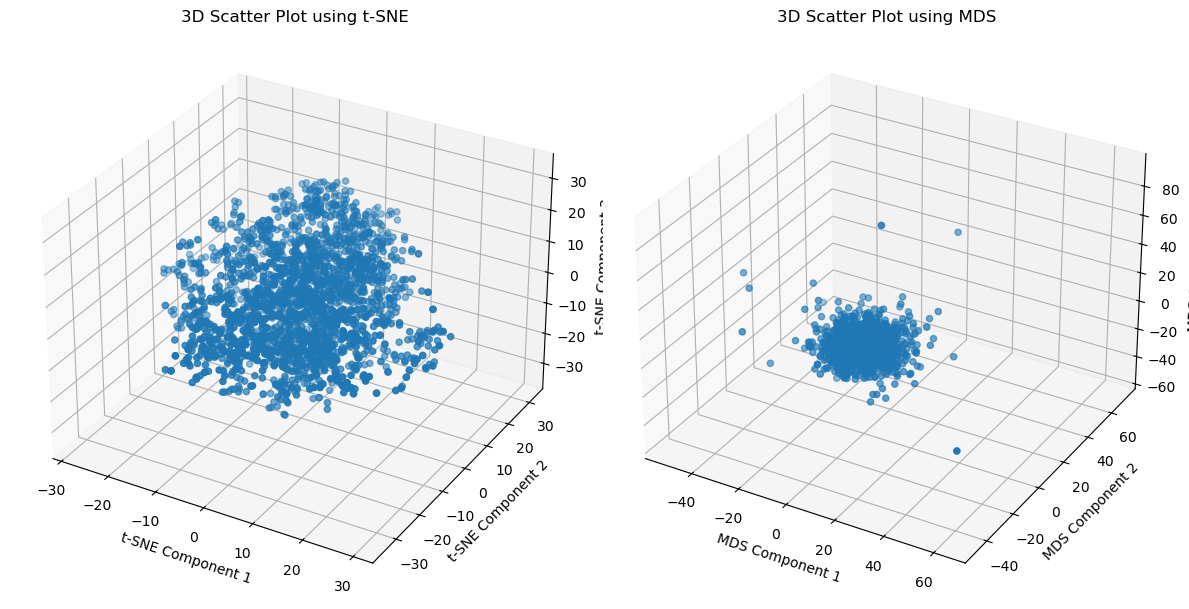

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS

# Transpose X1 data so that each document is represented as a row
X1 = X1.T

### Step 1: Dimensionality reduction using t-SNE
tsne = TSNE(n_components=3, random_state=42)
X1_tsne = tsne.fit_transform(X1)

### Step 2: Dimensionality reduction using MDS
mds = MDS(n_components=3, random_state=42)
X1_mds = mds.fit_transform(X1)


### Step 3: Create a 1x2 subplot for t-SNE and MDS
fig = plt.figure(figsize=(12, 6))

# t-SNE subplot
ax_tsne = fig.add_subplot(121, projection='3d')  # 1x2 grid, 1st plot
ax_tsne.scatter(X1_tsne[:, 0], X1_tsne[:, 1], X1_tsne[:, 2])

# Set t-SNE axis labels and title
ax_tsne.set_xlabel('t-SNE Component 1')
ax_tsne.set_ylabel('t-SNE Component 2')
ax_tsne.set_zlabel('t-SNE Component 3')
ax_tsne.set_title('3D Scatter Plot using t-SNE')

# MDS subplot
ax_mds = fig.add_subplot(122, projection='3d')  # 1x2 grid, 2nd plot
ax_mds.scatter(X1_mds[:, 0], X1_mds[:, 1], X1_mds[:, 2])

# Set MDS axis labels and title
ax_mds.set_xlabel('MDS Component 1')
ax_mds.set_ylabel('MDS Component 2')
ax_mds.set_zlabel('MDS Component 3')
ax_mds.set_title('3D Scatter Plot using MDS')

# Show the plots side by side
plt.tight_layout()
plt.show()

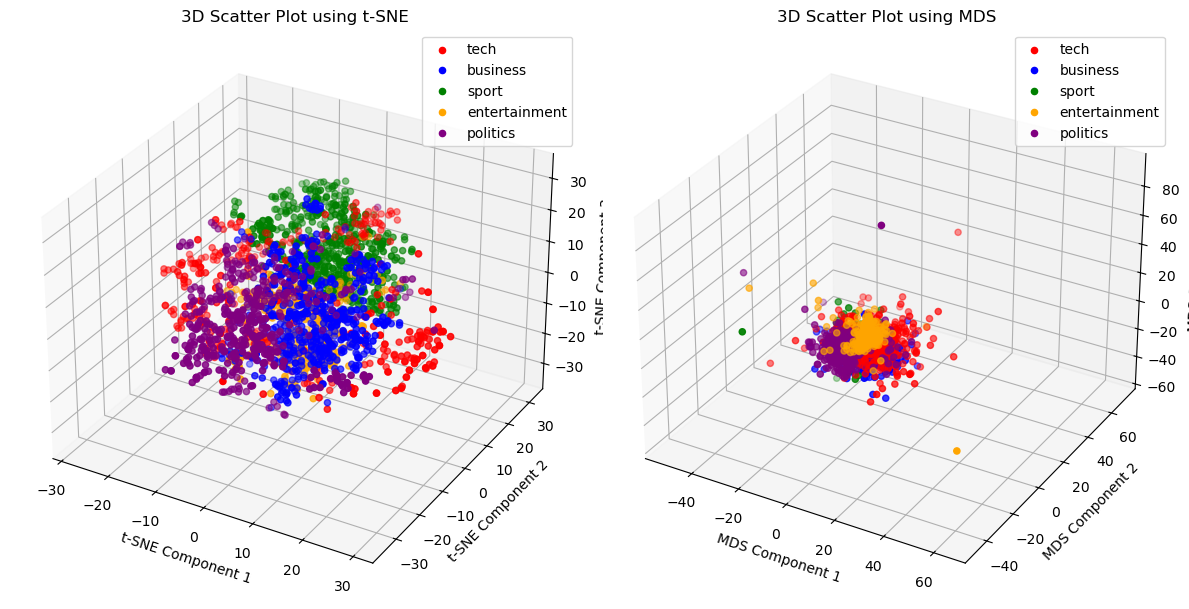

In [ ]:
# Step 1: Create a dictionary to map categories to corresponding indices
category_dict = defaultdict(list)
for idx, category in data['category'].items():
    category_dict[category].append(idx)

# Assigning a color to each category
category_colors = {
    "tech": "red",
    "business": "blue",
    "sport": "green",
    "entertainment": "orange",
    "politics": "purple"
}

# Step 2: Create the 1x2 plot for t-SNE and MDS with color-coding
fig = plt.figure(figsize=(12, 6))

# t-SNE plot
ax_tsne = fig.add_subplot(121, projection='3d')

# Color the points according to the category
for category, indices in category_dict.items():
    ax_tsne.scatter(X1_tsne[indices, 0], X1_tsne[indices, 1], X1_tsne[indices, 2],
                    color=category_colors[category], label=category)

ax_tsne.set_xlabel('t-SNE Component 1')
ax_tsne.set_ylabel('t-SNE Component 2')
ax_tsne.set_zlabel('t-SNE Component 3')
ax_tsne.set_title('3D Scatter Plot using t-SNE')
ax_tsne.legend()

# MDS plot
ax_mds = fig.add_subplot(122, projection='3d')

# Color the points according to the category
for category, indices in category_dict.items():
    ax_mds.scatter(X1_mds[indices, 0], X1_mds[indices, 1], X1_mds[indices, 2],
                   color=category_colors[category], label=category)

ax_mds.set_xlabel('MDS Component 1')
ax_mds.set_ylabel('MDS Component 2')
ax_mds.set_zlabel('MDS Component 3')
ax_mds.set_title('3D Scatter Plot using MDS')
ax_mds.legend()

plt.tight_layout()
plt.show()



In [ ]:
# Create a DataFrame to display word embeddings
embedding_df = pd.DataFrame(X2, index=Word_Document.index)
print("\nWord Embeddings (2D projection):")
embedding_df.head()


Word Embeddings (2D projection):


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ability,2.862327,-0.054268,0.010548,-0.579309,0.756406,-0.646615,0.822373,-0.373368,0.116560,-0.535235,...,0.116834,-0.430039,0.701574,-0.058867,0.302802,-0.235945,0.135455,-0.048789,0.046058,-0.117301
academy,0.995896,0.640049,-0.249306,1.677855,-0.557786,-2.524306,-0.416692,-0.022155,0.213228,-0.031276,...,-0.115430,0.387150,0.028821,0.118200,-0.215856,0.228559,0.247726,0.333180,0.026424,-0.053421
access,6.915507,0.155623,-2.019832,-6.728876,-0.833760,-2.537863,1.615103,1.681675,-1.510414,0.243370,...,0.577982,0.253279,-0.928979,-1.091690,0.549165,-2.001302,1.929092,-1.451218,0.529119,0.280837
account,4.179546,-0.592878,0.813198,-0.921489,-3.114995,1.313717,1.720736,0.308249,1.739343,-1.736480,...,0.866670,-0.655949,-1.560423,-2.820687,-0.706634,0.866404,-1.836908,0.513597,0.330336,-0.534940
act,6.426674,0.731403,-6.311200,5.337944,2.483923,2.921862,1.013405,3.654899,-3.014087,-4.099016,...,1.912461,0.786246,-0.245103,2.150494,-0.396446,-0.580318,-0.651247,-1.125168,0.171595,0.198158


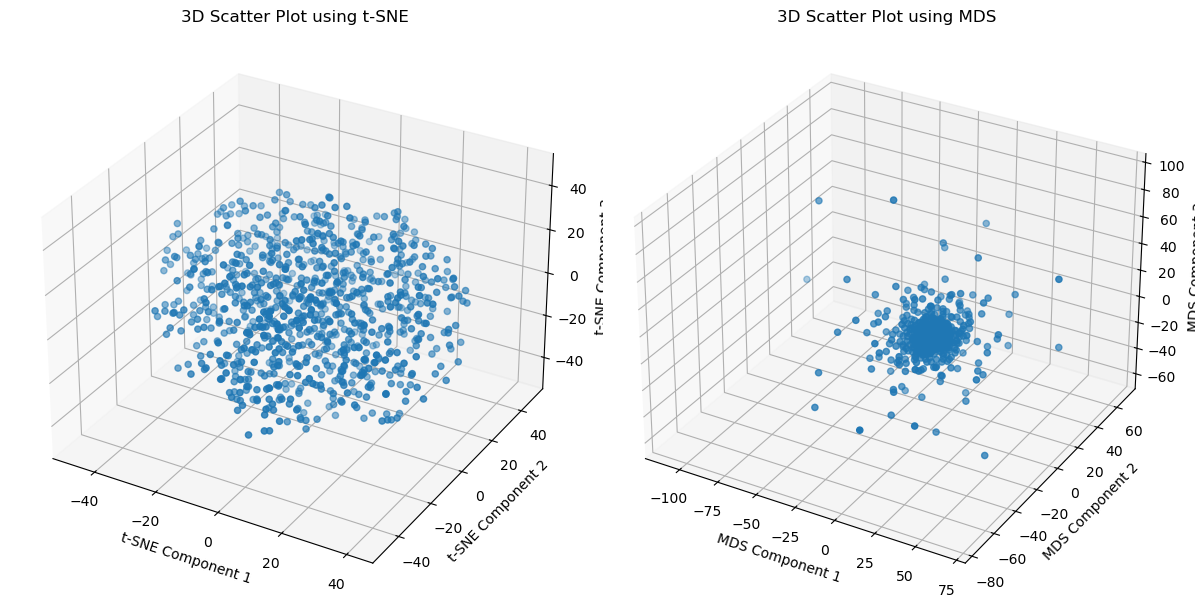

In [ ]:
### Step 1: Dimensionality reduction using t-SNE
tsne = TSNE(n_components=3, random_state=42)
X2_tsne = tsne.fit_transform(X2)

### Step 2: Dimensionality reduction using MDS
mds = MDS(n_components=3, random_state=42)
X2_mds = mds.fit_transform(X2)


### Step 3: Create a 1x2 subplot for t-SNE and MDS
fig = plt.figure(figsize=(12, 6))

# t-SNE subplot
ax_tsne = fig.add_subplot(121, projection='3d')  # 1x2 grid, 1st plot
ax_tsne.scatter(X2_tsne[:, 0], X2_tsne[:, 1], X2_tsne[:, 2])

# Set t-SNE axis labels and title
ax_tsne.set_xlabel('t-SNE Component 1')
ax_tsne.set_ylabel('t-SNE Component 2')
ax_tsne.set_zlabel('t-SNE Component 3')
ax_tsne.set_title('3D Scatter Plot using t-SNE')

# MDS subplot
ax_mds = fig.add_subplot(122, projection='3d')  # 1x2 grid, 2nd plot
ax_mds.scatter(X2_mds[:, 0], X2_mds[:, 1], X2_mds[:, 2])

# Set MDS axis labels and title
ax_mds.set_xlabel('MDS Component 1')
ax_mds.set_ylabel('MDS Component 2')
ax_mds.set_zlabel('MDS Component 3')
ax_mds.set_title('3D Scatter Plot using MDS')

# Show the plots side by side
plt.tight_layout()
plt.show()

In [ ]:
word_embedding_SVD = embedding_df.copy()

# Word2Vec

**Word2Vec** is one of the most popular algorithms for learning word embeddings (vector representations of words). Developed by researchers at Google, Word2Vec is widely used in Natural Language Processing (NLP) tasks because it captures semantic relationships between words. Instead of treating words as discrete tokens, it represents them as continuous vectors in a multi-dimensional space where semantically similar words are located closer to each other.

## How Word2Vec Works

Word2Vec models learn word representations by predicting words based on their context. It operates under the **Distributional Hypothesis**, which suggests that words that appear in similar contexts tend to have similar meanings.

![image-2.png](attachment:image-2.png)

There are two primary architectures for training Word2Vec models:

![image.png](attachment:image.png)

1. **Continuous Bag of Words (CBOW)**: In this architecture, the model tries to predict the target word based on the context words surrounding it. It averages the embeddings of the context words and uses this averaged vector to predict the target word.
   - In the image on the left, the context words `w(t-2)`, `w(t-1)`, `w(t+1)`, and `w(t+2)` are used to predict the target word `w(t)`. The embeddings of the context words are combined (summed or averaged) in the projection layer and then used to predict the target word.

<br>

2. **Skip-gram**: This architecture works in the opposite direction of CBOW. Given a target word, it predicts the surrounding context words.
   - In the image on the right, the target word `w(t)` is used to predict the context words `w(t-2)`, `w(t-1)`, `w(t+1)`, and `w(t+2)`. The model learns to predict each of the surrounding context words based on the target word.

Both architectures use neural networks to learn embeddings such that words with similar meanings or that appear in similar contexts are located near each other in the vector space.


In [ ]:
# Sample data
docs = [
    "tv future in the hands of viewers with home theatre systems",
    "worldcom boss left books alone former worldcom accounting",
    "tigers wary of farrell gamble leicester say gamble worth risk",
    "yeading face newcastle in fa cup premiership showdown",
    "ocean s twelve raids box office ocean s twelve"
]

In [ ]:
tokenized_docs = tokenize_corpus(docs)
tokenized_docs

[['tv', 'future', 'viewer', 'home', 'theatre', 'system'],
 ['worldcom', 'bos', 'book', 'worldcom', 'accounting'],
 ['tiger', 'worth', 'risk'],
 ['face', 'cup', 'premiership', 'showdown'],
 ['twelve', 'raid', 'box', 'office', 'ocean']]

In [ ]:
def generate_cbow_training_data(tokenized_corpus, window_size):
    data = []
    for words in tokenized_corpus:
        for i in range(window_size, len(words) - window_size):
            context = words[i - window_size:i] + words[i + 1:i + window_size + 1]
            target = words[i]
            data.append((context, target))
    return data

window_size = 2
cbow_training_data = generate_cbow_training_data(tokenized_docs, window_size)

print("CBOW Training Data:", cbow_training_data[:5])  # Display the first 5 training examples
print("Length of CBOW Training Data:", len(cbow_training_data))  # Display the length of training data

CBOW Training Data: [(['tv', 'future', 'home', 'theatre'], 'viewer'), (['future', 'viewer', 'theatre', 'system'], 'home'), (['worldcom', 'bos', 'worldcom', 'accounting'], 'book'), (['twelve', 'raid', 'office', 'ocean'], 'box')]
Length of CBOW Training Data: 4


In [ ]:
def generate_skipgram_training_data(tokenized_corpus, window_size):
    data = []
    for words in tokenized_corpus:
        for i in range(window_size, len(words) - window_size):
            target = words[i]
            context = words[i - window_size:i] + words[i + 1:i + window_size + 1]
            for context_word in context:
                data.append((target, context_word))
    return data

window_size = 2
skipgram_training_data = generate_skipgram_training_data(tokenized_docs, window_size)

print("Skip-gram Training Data:", skipgram_training_data[:5])  # Display the first 5 training examples
print("Length of Skip-gram Training Data:", len(skipgram_training_data))  # Display the length of training data


Skip-gram Training Data: [('viewer', 'tv'), ('viewer', 'future'), ('viewer', 'home'), ('viewer', 'theatre'), ('home', 'future')]
Length of Skip-gram Training Data: 16


# Learning Process:

Word2Vec is a neural network-based model used to generate word embeddings—dense vector representations of words that capture their semantic relationships. **Skip-gram** and **CBOW** (Continuous Bag of Words) models are both trained using a simple neural network with one hidden layer and a softmax output layer.

## Word2Vec Architecture

### 1. Input Layer
- For **Skip-gram**, the input is a **target word**, and the output is the predicted **context words** surrounding the target word.
- For **CBOW**, the input is the surrounding **context words**, and the output is the predicted **target word**.
- The input words are represented as one-hot encoded vectors, where each word is represented as a sparse binary vector (with the length equal to the vocabulary size).

### 2. Hidden Layer
- The hidden layer contains a weight matrix that maps high-dimensional one-hot encoded vectors to lower-dimensional vectors. These are the **word embeddings** that the model learns during training.
- The dimensionality of this layer corresponds to the size of the word embeddings (e.g., 100 or 300 dimensions).

### 3. Output Layer
- The output layer consists of another weight matrix that maps the word embeddings from the hidden layer back to a vocabulary-sized vector (one-hot encoded vectors).
- In **Skip-gram**, the network predicts the surrounding context words given the target word.
- In **CBOW**, the network predicts the target word based on the input context words.

### 4. Softmax Function
- The softmax function is used to compute the probability distribution over all words in the vocabulary. It ensures that the output is a valid probability distribution (i.e., the sum of all probabilities is 1).

The softmax function for word prediction can be written as:

$$
P(w_O | w_I) = \frac{\exp(v_O \cdot v_I)}{\sum_{w=1}^{W} \exp(v_w \cdot v_I)}
$$

Where:
- $v_O$ is the vector representation (embedding) of the output (context) word.
- $v_I$ is the vector representation (embedding) of the input (target) word.
- $W$ is the size of the vocabulary.

---

## Training Word2Vec

The Word2Vec network is trained using **stochastic gradient descent** (SGD), a popular optimization technique, to minimize the **cross-entropy loss** function.

### Cross-Entropy Loss:
In the context of Word2Vec, the **cross-entropy loss** measures how well the predicted probability distribution (from the model) matches the actual distribution (which is 1 for the true word and 0 for all others). Cross-entropy loss is used because Word2Vec is a classification problem, where the goal is to classify a word given its context (or vice versa).

The cross-entropy loss function is:

$$
L = -\sum_{i=1}^{W} y_i \log(P(w_i|w_t))
$$

Where:
- $y_i$ is the actual label (1 for the true word, 0 for all others).
- $P(w_i|w_t)$ is the predicted probability for word $w_i$ given the word $w_t$.

### Stochastic Gradient Descent (SGD):
**SGD** is an optimization method that updates the weights of the model by calculating the gradient of the loss function with respect to the model's weights. Instead of computing the gradients for the entire dataset (as in batch gradient descent), **SGD** updates the weights after looking at each training example, making it computationally more efficient and allowing the model to learn more dynamically.

For **Skip-gram**, the objective is to maximize the probability of predicting context words given a target word. This can be represented as:

$$
\max \prod_{t=1}^{T} \prod_{-c \leq j \leq c, j \neq 0} P(w_{t+j} | w_t)
$$

Where:
- $T$ is the total number of words in the corpus.
- $c$ is the context window size.
- $w_t$ is the target word at position $t$.
- $w_{t+j}$ are the context words within the window size.

---

## For CBOW

For **CBOW**, the goal is the reverse of Skip-gram: predicting the target word given the context words. The model uses the context words to calculate a probability distribution over the vocabulary for the target word.

The CBOW probability function is:

$$
P(w_t | w_{t-2}, w_{t-1}, w_{t+1}, w_{t+2}) = \frac{\exp(v_t \cdot \sum_{j=-c}^{c, j \neq 0} v_{t+j})}{\sum_{w=1}^{W} \exp(v_w \cdot \sum_{j=-c}^{c, j \neq 0} v_{t+j})}
$$

Where:
- $w_t$ is the target word.
- $v_{t+j}$ are the context word embeddings.
- $W$ is the size of the vocabulary.

This objective is to maximize the probability of the target word $w_t$ given the context words. The key difference from Skip-gram is that CBOW averages the embeddings of the context words and uses that to predict the target word.

---

## Challenges and Solutions for Word2Vec

### 1. **Computational Efficiency**

Training Word2Vec can be computationally expensive, especially when dealing with large corpora and vocabularies. Calculating the softmax function during training requires computing the dot product between the input vector and every output vector in the vocabulary, which can be slow and memory-intensive.

#### Solution: Negative Sampling
To address this, **negative sampling** is used. Negative sampling simplifies the softmax calculation by only considering a few **negative examples** (words that are not in the context) instead of the entire vocabulary. The idea is to train the model to differentiate between positive examples (words in the context) and negative examples (randomly sampled words).

The loss function for negative sampling is:

$$
L = \log \sigma(v_{O} \cdot v_{w_I}) + \sum_{i=1}^k \mathbb{E}_{N_k \sim P_n(w)} \log \sigma(-v_{i}  \cdot v_{N_k})
$$

Where:
- $\sigma(x) = \frac{1}{1 + e^{-x}}$ is the sigmoid function.
- $K$ is the number of negative samples.
- $v_{N_k}$ represents the embedding of a negative sample word $N_k$.

# Word2Vec with Gensim

- https://radimrehurek.com/gensim/models/word2vec.html

Gensim is a popular Python library for topic modeling, document indexing, and similarity retrieval with large text corpora. It provides an efficient implementation of the Word2Vec model, which is used to learn word embeddings (dense vector representations of words).

In [ ]:
!pip install gensim

# Training the Word2Vec Model

To train the Word2Vec model in Gensim, use the following parameters:

- **sentences**: A list of tokenized sentences.
- **vector_size**: Dimensionality of the word embeddings.
- **window**: Context window size.
- **min_count**: Minimum count of words to include in the vocabulary.
- **sg**: If set to 1, uses Skip-Gram; if 0, uses CBOW.
- **negative**: Number of negative samples for negative sampling.

In [ ]:
tokenized_docs = tokenize_corpus(data['text'])
len(tokenized_docs)

2225

In [ ]:
tokenized_docs[0]

['tv',
 'future',
 'viewer',
 'home',
 'system',
 'highdefinition',
 'video',
 'recorder',
 'living',
 'room',
 'way',
 'people',
 'tv',
 'year',
 'time',
 'panel',
 'consumer',
 'electronics',
 'vega',
 'technology',
 'favourite',
 'trend',
 'programme',
 'viewer',
 'home',
 'network',
 'cable',
 'satellite',
 'telecom',
 'company',
 'service',
 'provider',
 'room',
 'device',
 'talkedabout',
 'technology',
 'video',
 'recorder',
 'box',
 'sky',
 'system',
 'people',
 'record',
 'store',
 'play',
 'tv',
 'programme',
 'technology',
 'tv',
 'tv',
 'set',
 'business',
 'europe',
 'lack',
 'highdefinition',
 'people',
 'advert',
 'network',
 'channel',
 'schedule',
 'entertainment',
 'cable',
 'satellite',
 'company',
 'mean',
 'term',
 'revenue',
 'brand',
 'identity',
 'loyalty',
 'channel',
 'technology',
 'moment',
 'concern',
 'service',
 'sky',
 'happens',
 'today',
 'month',
 'year',
 'time',
 'adam',
 'hume',
 'bbc',
 'broadcast',
 'futurologist',
 'news',
 'website',
 'like',
 '

In [ ]:
from gensim.models import Word2Vec

# Train the Word2Vec model
model = Word2Vec(
    sentences=tokenized_docs,     # List of tokenized sentences
    vector_size=100,         # Dimensionality of the word vectors
    window=2,                # Context window size
    min_count=10,             # Minimum frequency count of words to include
    sg=1,                    # Use Skip-Gram; 0 for CBOW
    negative=2,              # Negative sampling
    workers = 4,               # Number of CPU cores to use
    epochs=100                # Number of training epochs
)


Saving and Loading the Model

In [ ]:
# Save the model
model.save("word2vec.model")

# Load the model
model = Word2Vec.load("word2vec.model")

Find Similar Words


To find the top N words similar to a given word:

In [ ]:
model.wv.index_to_key

['year',
 'people',
 'mr',
 'game',
 'time',
 'world',
 'government',
 'company',
 'film',
 'firm',
 'number',
 'service',
 'month',
 'way',
 'music',
 'country',
 'player',
 'market',
 'week',
 'party',
 'minister',
 'sale',
 'election',
 'day',
 'home',
 'technology',
 'group',
 'plan',
 'part',
 'phone',
 'blair',
 'system',
 'report',
 'tax',
 'news',
 'work',
 'share',
 'price',
 'bn',
 'bank',
 'director',
 'business',
 'economy',
 'award',
 'problem',
 'growth',
 'industry',
 'law',
 'tv',
 'show',
 'record',
 'job',
 'place',
 'money',
 'user',
 'thing',
 'issue',
 'computer',
 'rate',
 'cost',
 'decision',
 'state',
 'figure',
 'deal',
 'network',
 'life',
 'analyst',
 'consumer',
 'court',
 'case',
 'star',
 'team',
 'leader',
 'security',
 'software',
 'office',
 'action',
 'point',
 'executive',
 'spokesman',
 'nation',
 'information',
 'campaign',
 'wale',
 'interest',
 'bbc',
 'side',
 'change',
 'medium',
 'england',
 'radio',
 'play',
 'power',
 'child',
 'club',
 'memb

In [ ]:
model.wv.__dict__

{'vector_size': 100,
 'index_to_key': ['year',
  'people',
  'mr',
  'game',
  'time',
  'world',
  'government',
  'company',
  'film',
  'firm',
  'number',
  'service',
  'month',
  'way',
  'music',
  'country',
  'player',
  'market',
  'week',
  'party',
  'minister',
  'sale',
  'election',
  'day',
  'home',
  'technology',
  'group',
  'plan',
  'part',
  'phone',
  'blair',
  'system',
  'report',
  'tax',
  'news',
  'work',
  'share',
  'price',
  'bn',
  'bank',
  'director',
  'business',
  'economy',
  'award',
  'problem',
  'growth',
  'industry',
  'law',
  'tv',
  'show',
  'record',
  'job',
  'place',
  'money',
  'user',
  'thing',
  'issue',
  'computer',
  'rate',
  'cost',
  'decision',
  'state',
  'figure',
  'deal',
  'network',
  'life',
  'analyst',
  'consumer',
  'court',
  'case',
  'star',
  'team',
  'leader',
  'security',
  'software',
  'office',
  'action',
  'point',
  'executive',
  'spokesman',
  'nation',
  'information',
  'campaign',
  'wale

In [ ]:
similar_words = model.wv.most_similar('tv', topn=5)
print(similar_words)

[('recorder', 0.502654492855072), ('sky', 0.4729086458683014), ('hd', 0.4576886296272278), ('television', 0.44726309180259705), ('settop', 0.4443504512310028)]


To compute the similarity score between two words:

In [ ]:
similarity_score = model.wv.similarity('tv', 'future')
print(f"Similarity between 'tv' and 'future': {similarity_score}")

Similarity between 'tv' and 'future': 0.13322165608406067


To find the word that does not belong in a list of words:

In [ ]:
odd_word = model.wv.doesnt_match(['tv', 'viewer', 'tiger', 'future'])
print(f"Odd one out: {odd_word}")

Odd one out: tiger


To solve analogy problems like “car pulls ___”:

In [ ]:
result = model.wv.most_similar(positive=['car', 'pull'], topn=5)
print(result)

[('bmw', 0.46866360306739807), ('vehicle', 0.45810526609420776), ('fiat', 0.4561787545681), ('gm', 0.4369141757488251), ('franchise', 0.43075481057167053)]


### Tuning the Word2Vec Model

Some important parameters to tune when training the Word2Vec model:

- **vector_size**: The dimensionality of the word embeddings. Default is 100. Larger dimensions can capture more detailed relationships but require more computation.
- **window**: The context window size. A larger window size captures broader context but may lose fine-grained relationships.
- **min_count**: Ignores words that appear less than `min_count` times in the corpus.
- **sg**: Training algorithm (1 for Skip-Gram, 0 for CBOW).
- **negative**: Number of negative samples. Common values are between 5 and 10.


# Doc2Vec with Gensim

**Doc2Vec** is an extension of the **Word2Vec** model that is used to create vector representations for entire documents, not just individual words. Like Word2Vec, it is used to embed text data into continuous vector spaces that capture semantic similarities. However, instead of focusing on individual words, Doc2Vec creates embeddings for documents or paragraphs.

Doc2Vec was introduced by Mikolov et al. in the paper titled **"Distributed Representations of Sentences and Documents"**. It allows the model to capture relationships between documents and words, as well as relationships between different documents. This is especially useful for tasks like document classification, sentiment analysis, and retrieving similar documents.

---

## Doc2Vec Architectures

Doc2Vec has two main architectures:

![image.png](attachment:image.png)

### 1. Distributed Memory (DM) Model

The **Distributed Memory (DM)** model is similar to the **CBOW** model in Word2Vec. In this approach, the document vector is combined with the context word vectors to predict the next word in the sequence. The idea is that the document vector acts like a memory that remembers what is missing from the context (hence "memory").

- **How it works**: The document vector (which is randomly initialized) and the context word vectors are concatenated or averaged, and then a word in the document is predicted.
  
- **Learning**: The document vector is updated along with the word vectors during training, so it can "remember" the context of the entire document.

### 2. Distributed Bag of Words (DBOW) Model

The **Distributed Bag of Words (DBOW)** model is similar to the **Skip-Gram** model in Word2Vec. In DBOW, the model tries to predict words randomly sampled from the document using only the document vector, without using the context words.

- **How it works**: The model is trained to predict a randomly sampled word from the document given the document vector, but without considering the surrounding words. This makes it more efficient but less context-aware than the DM model.
  
- **Learning**: Only the document vector is updated in this architecture, and word vectors are ignored during prediction.

---

## How Doc2Vec Works

The main idea behind Doc2Vec is to treat each document (or sentence, or paragraph) as a unique entity and assign it a vector representation. During training, both word and document vectors are learned simultaneously based on their relationships in the text.

For each document in the training corpus, the model:

1. Initializes a document vector randomly.
2. Learns word vectors using Word2Vec-like training (either Skip-Gram or CBOW).
3. Updates both the word vectors and the document vector iteratively to minimize the error for predicting words from the document.

---

## Doc2Vec Parameters

Some important parameters for training a Doc2Vec model include:

- **vector_size**: The size of the vector for the document embeddings (similar to word embeddings in Word2Vec).
- **window**: The maximum distance between the current and predicted word within a sentence.
- **min_count**: Ignores all words with total frequency lower than this value.
- **dm**: Defines the training algorithm. If `dm=1`, Distributed Memory (DM) is used. If `dm=0`, Distributed Bag of Words (DBOW) is used.
- **epochs**: Number of training iterations over the corpus.
- **workers**: Number of CPU cores to use for training (parallelization).


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Example training data (list of tokenized sentences, each tagged with an ID)
documents = [TaggedDocument(words=tokens, tags=str(idx)) for idx, tokens in enumerate(tokenized_docs)]

# Initialize the Doc2Vec model
model = Doc2Vec(
    vector_size=100,   # Dimensionality of the document vectors
    window=5,          # Context window size
    min_count=1,       # Ignores words with frequency less than this
    workers=4,         # Number of CPU cores to use
    epochs=20,         # Number of training iterations
    dm=1               # Using Distributed Memory model (set to 0 for DBOW)
)

# Build the vocabulary from the corpus
model.build_vocab(documents)

# Train the Doc2Vec model
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

# Save the model
model.save("doc2vec.model")

# Load the model
model = Doc2Vec.load("doc2vec.model")

Infer a vector for a new document:

In [ ]:
new_doc = ['car','pull']
vector = model.infer_vector(new_doc)
print(vector)

[-0.03009414 -0.03635619 -0.00933894 -0.0185359   0.00781557  0.01581997
 -0.01058393 -0.01391688  0.00507316  0.03807586  0.0005509   0.02193531
  0.00659528  0.00293497  0.0466266  -0.02492692 -0.03692283 -0.01590487
  0.03003044 -0.01424227  0.0151939  -0.0095233  -0.01284599  0.02694393
  0.00447438  0.02365631 -0.02874777 -0.03554522 -0.01747326 -0.04303069
  0.03822853  0.01185897  0.01749045  0.02468269 -0.02847593  0.02780396
 -0.00656951 -0.10500007 -0.03335478 -0.07887145  0.02984726  0.03301818
  0.02402402 -0.04615996 -0.00546715  0.01070227  0.03526032  0.03636211
  0.0127846  -0.02088439 -0.03615991  0.05530726 -0.02567698 -0.00903009
 -0.02831366 -0.00934459 -0.03805524  0.09673364 -0.01578301 -0.05316108
  0.07401501  0.05886094  0.02719218 -0.01942028 -0.0076902  -0.017028
  0.02452306  0.02487946 -0.01820314  0.03496579 -0.02811394 -0.01175677
 -0.08746365 -0.01081887  0.02409772 -0.00352866  0.01175658 -0.11025782
 -0.02521539 -0.00513743  0.03331432  0.07446777 -0.0

Find most similar documents:

In [ ]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
data.loc[5]

category                                             politics
text        howard hits back at mongrel jibe michael howar...
Name: 5, dtype: object

In [ ]:
data.loc[8]

category                                                sport
text        wilkinson fit to face edinburgh england captai...
Name: 8, dtype: object

In [ ]:
similar_docs = model.docvecs.most_similar('1')
print(similar_docs)

[('9', -0.08118045330047607), ('6', -0.08705967664718628), ('8', -0.09697987884283066), ('3', -0.09760753810405731), ('0', -0.09877495467662811), ('5', -0.11976692080497742), ('7', -0.12201645225286484), ('4', -0.12708815932273865), ('2', -0.12715105712413788)]


Find similarity between two documents:

In [ ]:
similarity = model.docvecs.similarity('1', '2')
print(f"Similarity between doc1 and doc2: {similarity}")

Similarity between doc1 and doc2: -0.12715104222297668


# Word2Vec without Gensim (Next Lecture)

In [ ]:
import numpy as np

vocabulary = set()

for doc in tokenized_docs:
    vocabulary.update(doc)
print(vocabulary)

vocab_size = len(vocabulary)
word_to_index = {word: idx for idx, word in enumerate(vocabulary)}
index_to_word = {idx: word for idx, word in enumerate(vocabulary)}

# Function to one-hot encode words
def one_hot_vector(word_idx, vocab_size):
    vec = np.zeros(vocab_size)
    vec[word_idx] = 1
    return vec

{'financier', 'kuznetsova', 'smes', 'connacht', 'hamlet', 'dub', 'edition', 'jpmorgan', 'cringe', 'connectedness', 'henson', 'karkouri', 'lancashire', 'reminiscent', 'possession', 'exoskeleton', 'humanlike', 'intoppa', 'obscurity', 'soprano', 'xda', 'photograph', 'standing', 'gsm', 'chaiyasoot', 'gb', 'adera', 'secondrate', 'dowson', 'halser', 'maso', 'relocation', 'patsy', 'libya', 'hewland', 'seychelles', 'inept', 'daybyday', 'boe', 'bozell', 'shadowcrewcom', 'tweak', 'stricter', 'stagnation', 'albacete', 'deeply', 'quittenton', 'operation', 'press', 'budd', 'watching', 'cockbain', 'polluter', 'hove', 'hinckley', 'blogzine', 'fluctuation', 'introduces', 'hagerstown', 'chief', 'hiatus', 'jugnot', 'remand', 'calculator', 'truancy', 'gammage', 'inherit', 'fn', 'historical', 'soviet', 'transistor', 'misgiving', 'epa', 'medecins', 'belief', 'reich', 'chest', 'cotis', 'chinauk', 'tent', 'meter', 'bernd', 'absolution', 'ed', 'veil', 'reinstate', 'doncaster', 'monument', 'dj', 'placement', '

In [ ]:
import numpy as np

class Word2Vec:
    def __init__(self, vocab_size, embedding_dim, learning_rate=0.01, epochs=100):
        self.vocab_size = vocab_size  # Size of the vocabulary
        self.embedding_dim = embedding_dim  # Number of dimensions for word embeddings
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.epochs = epochs  # Number of epochs to train
        self.W1 = np.random.uniform(-0.8, 0.8, (self.vocab_size, self.embedding_dim))  # Embedding matrix (input -> hidden)
        self.W2 = np.random.uniform(-0.8, 0.8, (self.embedding_dim, self.vocab_size))  # Output weight matrix (hidden -> output)

    # Softmax function to compute probabilities
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))  # Stability improvement
        return exp_x / exp_x.sum(axis=0)  # Normalize to get probabilities

    # Forward pass: from input to hidden to output
    def forward_pass(self, x):
        h = np.dot(self.W1.T, x)  # Compute the hidden layer (h = W1^T x)
        u_c = np.dot(self.W2.T, h)  # Compute raw scores for the output layer (u_c = W2^T h)
        y_c = self.softmax(u_c)  # Apply softmax to get probabilities
        return y_c, h, u_c

    # Backpropagation step to update weight matrices W1 and W2
    def backprop(self, e, h, x):
        # Compute gradients
        dl_dw2 = np.outer(h, e)  # Gradient for W2
        dl_dw1 = np.outer(x, np.dot(self.W2, e))  # Gradient for W1

        # Update weights
        self.W1 -= self.learning_rate * dl_dw1  # Update input -> hidden weights (W1)
        self.W2 -= self.learning_rate * dl_dw2  # Update hidden -> output weights (W2)

    # Cross Entropy Loss function
    def cross_entropy_loss(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred + 1e-9))  # Adding a small value for numerical stability

    # Training the Word2Vec model
    def train(self, training_data):
        for epoch in range(self.epochs):
            total_loss = 0

            for context_words, target_word in training_data:
                # Context words are combined to a single vector (average of word embeddings)
                x = np.mean(context_words, axis=0)

                # Forward pass
                y_pred, h, u = self.forward_pass(x)

                # Calculate error (difference between predicted and target word distribution)
                error = y_pred - target_word  # Cross-entropy derivative

                # Backpropagation step
                self.backprop(error, h, x)

                # Compute loss using Cross Entropy
                loss = self.cross_entropy_loss(target_word, y_pred)
                total_loss += loss

            print(f'Epoch: {epoch+1}, Loss: {total_loss}')

    # Predict the output word probabilities given an input word
    def predict(self, x):
        y_pred, _, _ = self.forward_pass(x)
        return y_pred


In [ ]:
# Create training data (context, target)
training_data = []
window_size = 5

for doc in tokenized_docs:
    doc_idx = [word_to_index[word] for word in doc]
    for idx, target_idx in enumerate(doc_idx):
        # Context words (left and right within window size)
        context_idxs = [
            doc_idx[i] for i in range(max(0, idx - window_size), min(len(doc_idx), idx + window_size + 1))
            if i != idx
        ]
        context_words = np.array([one_hot_vector(i, len(vocabulary)) for i in context_idxs])
        target_word = one_hot_vector(target_idx, len(vocabulary))
        training_data.append((context_words, target_word))

# Display training data for illustration
for context, target in training_data[0:5]:
    print("Context Words:", [index_to_word[np.argmax(word)] for word in context], " -> Target Word:", index_to_word[np.argmax(target)])


Context Words: ['future', 'viewer', 'home', 'theatre', 'system']  -> Target Word: tv
Context Words: ['tv', 'viewer', 'home', 'theatre', 'system']  -> Target Word: future
Context Words: ['tv', 'future', 'home', 'theatre', 'system']  -> Target Word: viewer
Context Words: ['tv', 'future', 'viewer', 'theatre', 'system']  -> Target Word: home
Context Words: ['tv', 'future', 'viewer', 'home', 'system']  -> Target Word: theatre


In [ ]:
embedding_dim = 100  # Small embedding size for simplicity
model = Word2Vec(vocab_size=vocab_size, embedding_dim=embedding_dim, learning_rate=0.01, epochs=200)
# Train the model on the dataset
model.train(training_data)

Epoch: 1, Loss: 94.93666799093067
Epoch: 2, Loss: 90.71895866178966
Epoch: 3, Loss: 86.93553800758431
Epoch: 4, Loss: 83.50847575494345
Epoch: 5, Loss: 80.37683225117071
Epoch: 6, Loss: 77.49331802832776
Epoch: 7, Loss: 74.82081176383689
Epoch: 8, Loss: 72.32971844375099
Epoch: 9, Loss: 69.99613731904824
Epoch: 10, Loss: 67.80059177567406
Epoch: 11, Loss: 65.7271116465105
Epoch: 12, Loss: 63.76253587730601
Epoch: 13, Loss: 61.89596155076146
Epoch: 14, Loss: 60.118299216777395
Epoch: 15, Loss: 58.42191176398764
Epoch: 16, Loss: 56.80032210959719
Epoch: 17, Loss: 55.24797861108788
Epoch: 18, Loss: 53.76006890620674
Epoch: 19, Loss: 52.332374054704005
Epoch: 20, Loss: 50.96115583725812
Epoch: 21, Loss: 49.64307098399804
Epoch: 22, Loss: 48.375106957086295
Epoch: 23, Loss: 47.15453467328217
Epoch: 24, Loss: 45.97887420659529
Epoch: 25, Loss: 44.845870058506364
Epoch: 26, Loss: 43.75347303905354
Epoch: 27, Loss: 42.69982619139183
Epoch: 28, Loss: 41.68325254550439
Epoch: 29, Loss: 40.702242

In [ ]:
# Test prediction
input_word = 'tv'
input_vector = one_hot_vector(word_to_index[input_word], vocab_size)

# Predict the probabilities for the context words
predicted_probs = model.predict(input_vector)

# Get the most likely context words based on prediction
predicted_word_idx = np.argmax(predicted_probs)
predicted_word = index_to_word[predicted_word_idx]

print(f"Predicted context word for '{input_word}': {predicted_word}")


In [ ]:
class Word2VecSkipGram:
    def __init__(self, vocab_size, embedding_dim, learning_rate=0.01, epochs=100):
        self.vocab_size = vocab_size  # Size of the vocabulary
        self.embedding_dim = embedding_dim  # Number of dimensions for word embeddings
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.epochs = epochs  # Number of epochs to train
        self.W1 = np.random.uniform(-0.8, 0.8, (self.vocab_size, self.embedding_dim))  # Embedding matrix (input -> hidden)
        self.W2 = np.random.uniform(-0.8, 0.8, (self.embedding_dim, self.vocab_size))  # Output weight matrix (hidden -> output)

    # Softmax function to compute probabilities
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))  # Stability improvement
        return exp_x / exp_x.sum(axis=0)  # Normalize to get probabilities

    # Forward pass: from input to hidden to output
    def forward_pass(self, x):
        h = np.dot(self.W1.T, x)  # Compute the hidden layer (h = W1^T x)
        u_c = np.dot(self.W2.T, h)  # Compute raw scores for the output layer (u_c = W2^T h)
        y_c = self.softmax(u_c)  # Apply softmax to get probabilities
        return y_c, h, u_c

    # Backpropagation step to update weight matrices W1 and W2
    def backprop(self, e, h, x):
        # Compute gradients
        dl_dw2 = np.outer(h, e)  # Gradient for W2
        dl_dw1 = np.outer(x, np.dot(self.W2, e))  # Gradient for W1

        # Update weights
        self.W1 -= self.learning_rate * dl_dw1  # Update input -> hidden weights (W1)
        self.W2 -= self.learning_rate * dl_dw2  # Update hidden -> output weights (W2)

    # Cross Entropy Loss function
    def cross_entropy_loss(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred + 1e-9))  # Adding a small value for numerical stability

    # Training the Word2Vec model
    def train(self, training_data):
        for epoch in range(self.epochs):
            total_loss = 0

            for center_word, context_words in training_data:
                # One hot encode the center word (input)
                x = center_word

                # Forward pass
                y_pred, h, u = self.forward_pass(x)

                # Backpropagation step for each context word
                for context_word in context_words:
                    error = y_pred - context_word  # Cross-entropy derivative
                    self.backprop(error, h, x)

                    # Compute loss using Cross Entropy
                    loss = self.cross_entropy_loss(context_word, y_pred)
                    total_loss += loss

            print(f'Epoch: {epoch+1}, Loss: {total_loss}')

    # Predict the output word probabilities given an input word
    def predict(self, x):
        y_pred, _, _ = self.forward_pass(x)
        return y_pred


In [ ]:
# Create training data (center, context)
training_data = []
window_size = 5

for doc in tokenized_docs:
    doc_idx = [word_to_index[word] for word in doc]
    for idx, center_idx in enumerate(doc_idx):
        # Context words (left and right within window size)
        context_idxs = [
            doc_idx[i] for i in range(max(0, idx - window_size), min(len(doc_idx), idx + window_size + 1))
            if i != idx
        ]
        center_word = one_hot_vector(center_idx, len(vocabulary))
        context_words = np.array([one_hot_vector(i, len(vocabulary)) for i in context_idxs])
        training_data.append((center_word, context_words))

# Display training data for illustration
for center, context in training_data[0:5]:
    print("Center Word:", index_to_word[np.argmax(center)], " -> Context Words:", [index_to_word[np.argmax(word)] for word in context])


In [ ]:
# Initialize Word2VecSkipGram model
embedding_dim = 100  # Small embedding size for simplicity
model = Word2VecSkipGram(vocab_size=vocab_size, embedding_dim=embedding_dim, learning_rate=0.01, epochs=200)

# Train the model on the dataset
model.train(training_data)

In [ ]:
# Test prediction
input_word = 'tv'
input_vector = one_hot_vector(word_to_index[input_word], vocab_size)

# Predict the probabilities for the context words
predicted_probs = model.predict(input_vector)

# Get the most likely context word based on prediction
predicted_word_idx = np.argmax(predicted_probs)
predicted_word = index_to_word[predicted_word_idx]

print(f"Predicted context word for '{input_word}': {predicted_word}")